In [1]:
import pandas as pd

# Veri setini yükleyelim
#data = pd.read_csv("dataset.csv")
data = pd.read_csv("dataset.csv", nrows=10000) 

# İlk birkaç satıra göz atalım
print(data.head())

# Veri setinin sütunlarını kontrol edelim
print(data.info())



   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [2]:
# Eksik verileri kontrol edelim
data = data.dropna(subset=["artists", "track_name", "popularity"])

# Popülerlik sırasına göre en iyi 10 şarkıyı görelim
top_tracks = data.sort_values(by="popularity", ascending=False).head(10)
print(top_tracks[["track_name", "artists", "popularity"]])


           track_name                   artists  popularity
2003  Sweater Weather         The Neighbourhood          93
3003  Sweater Weather         The Neighbourhood          93
2000     Daddy Issues         The Neighbourhood          87
3000     Daddy Issues         The Neighbourhood          87
3300         Miss You  Oliver Tree;Robin Schulz          87
3257   Mr. Brightside               The Killers          86
3004          abcdefu                     GAYLE          86
2002         Softcore         The Neighbourhood          86
3002         Softcore         The Neighbourhood          86
2106   Mr. Brightside               The Killers          86


In [3]:
from sklearn.metrics.pairwise import cosine_similarity

# Gerekli sütunları seçelim
features = data[["danceability", "energy", "popularity"]]

# Özellikleri normalize edelim
features = (features - features.min()) / (features.max() - features.min())

# Kosinüs benzerliğini hesaplayalım
similarity_matrix = cosine_similarity(features)

# Bir şarkıya benzer olanları öneren fonksiyon
def recommend_songs(track_name, data, similarity_matrix, n=5):
    # Şarkının indeksini bul
    track_index = data[data["track_name"] == track_name].index[0]
    
    # Benzerliklere göre sırala
    similar_indices = similarity_matrix[track_index].argsort()[-n-1:-1][::-1]
    
    # Önerilen şarkılar
    recommendations = data.iloc[similar_indices]
    return recommendations[["track_name", "artists", "popularity"]]

# Örnek: 'Hold On' adlı şarkıya benzer öneriler
recommendations = recommend_songs("Hold On", data, similarity_matrix)
print(recommendations)


                              track_name  \
427                            Salvation   
8543  Black Magic Woman - Single Version   
288                                12:51   
431                           Fall on Me   
5379                          Port Ormos   

                                   artists  popularity  
427                        Gabrielle Aplin          50  
8543                               Santana          67  
288                        krissy & ericka          64  
431   A Great Big World;Christina Aguilera          50  
5379                                Destly          49  


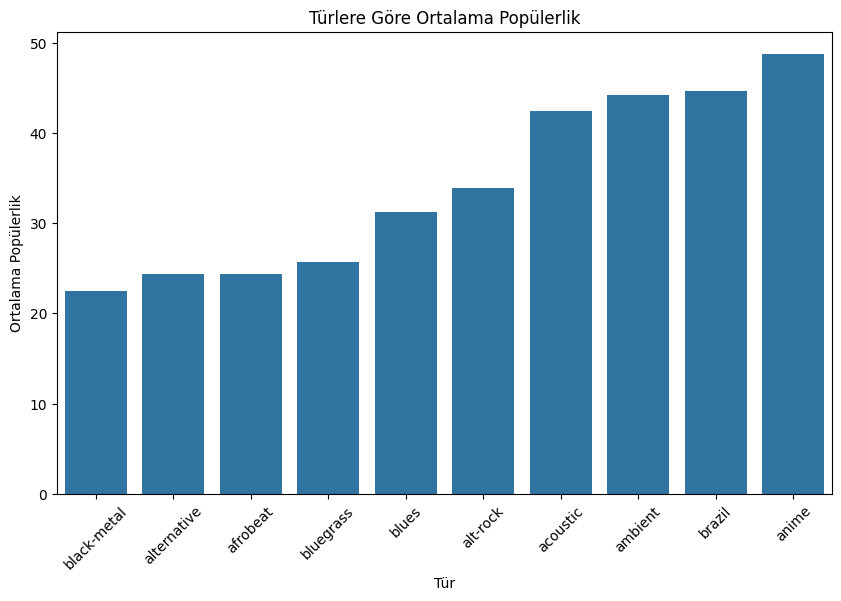

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Türlere göre ortalama popülerlik
genre_popularity = data.groupby("track_genre")["popularity"].mean().sort_values()

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values)
plt.title("Türlere Göre Ortalama Popülerlik")
plt.xlabel("Tür")
plt.ylabel("Ortalama Popülerlik")
plt.xticks(rotation=45)
plt.show()


In [6]:
# Kullanıcının tür seçimini varsayalım
favorite_genre = "acoustic"

# Kullanıcının seçtiği tür veri setinde mevcut mu?
if favorite_genre not in data["track_genre"].unique():
    print(f"'{favorite_genre}' türü mevcut değil. Varsayılan olarak 'acoustic' seçiliyor.")
    favorite_genre = "acoustic"

# Seçilen türe ait şarkılar
genre_recommendations = data[data["track_genre"] == favorite_genre].sort_values(
    by="popularity", ascending=False
).head(10)

print("Tür Bazlı Öneriler:")
print(genre_recommendations[["track_name", "artists", "popularity", "track_genre"]])


Tür Bazlı Öneriler:
               track_name                               artists  popularity  \
4                 Hold On                      Chord Overstreet          82   
7               I'm Yours                            Jason Mraz          80   
20              I'm Yours                            Jason Mraz          75   
60                   Pano                          Zack Tabudlo          75   
10   Give Me Your Forever                          Zack Tabudlo          74   
6           Say Something  A Great Big World;Christina Aguilera          74   
8                   Lucky             Jason Mraz;Colbie Caillat          74   
258         Asan Ka Na Ba                          Zack Tabudlo          73   
169             Love Song                        Sara Bareilles          73   
137        Suddenly I See                           KT Tunstall          73   

    track_genre  
4      acoustic  
7      acoustic  
20     acoustic  
60     acoustic  
10     acoustic  
6 

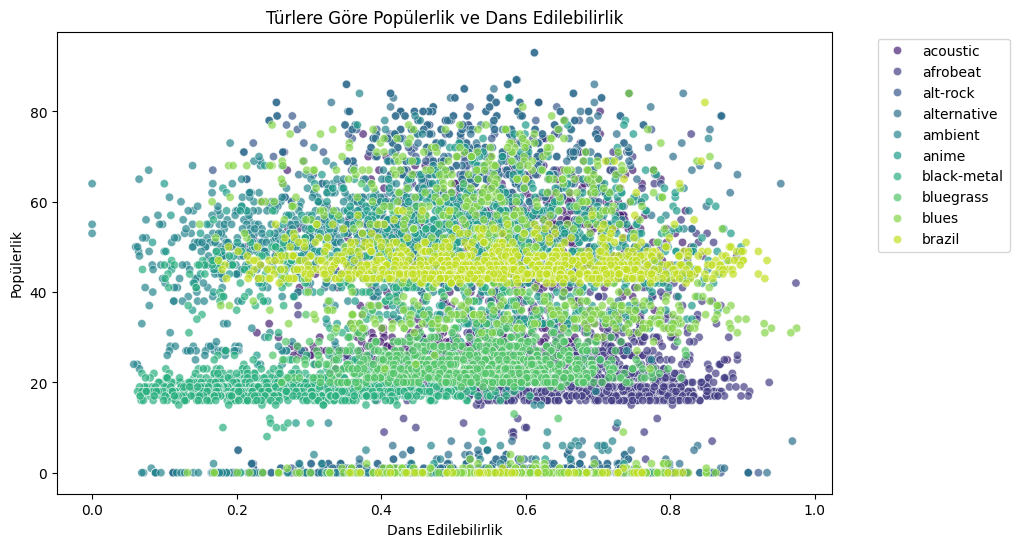

In [7]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="danceability",
    y="popularity",
    hue="track_genre",
    palette="viridis",
    alpha=0.7
)
plt.title("Türlere Göre Popülerlik ve Dans Edilebilirlik")
plt.xlabel("Dans Edilebilirlik")
plt.ylabel("Popülerlik")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/var/folders/v3/p30r3kw502zc4g5s4k8j6td40000gn/T/ipykernel_8055/2894067929.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["energy"], shade=True, label="Enerji", color="blue")
/var/folders/v3/p30r3kw502zc4g5s4k8j6td40000gn/T/ipykernel_8055/2894067929.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["acousticness"], shade=True, label="Akustiklik", color="orange")


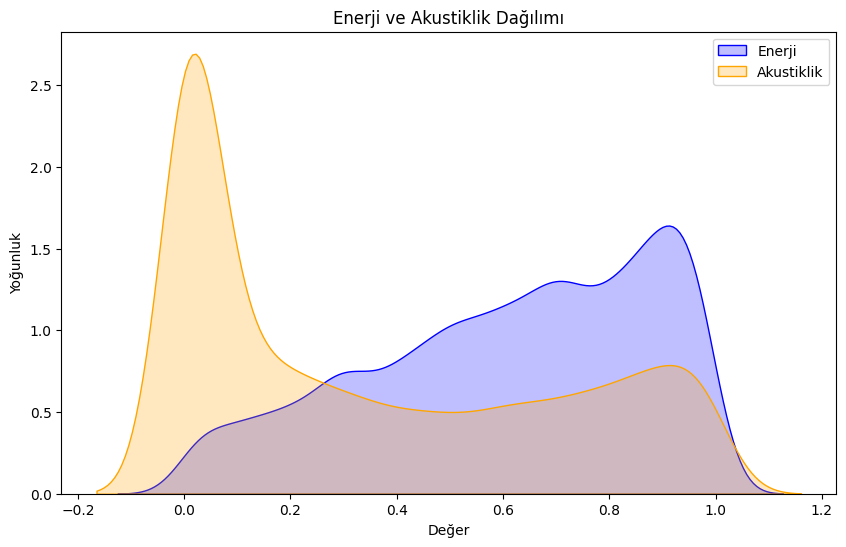

In [8]:
# KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data["energy"], shade=True, label="Enerji", color="blue")
sns.kdeplot(data["acousticness"], shade=True, label="Akustiklik", color="orange")
plt.title("Enerji ve Akustiklik Dağılımı")
plt.xlabel("Değer")
plt.ylabel("Yoğunluk")
plt.legend()
plt.show()


/var/folders/v3/p30r3kw502zc4g5s4k8j6td40000gn/T/ipykernel_8055/1922043094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="track_genre", y="danceability", data=data, palette="pastel")


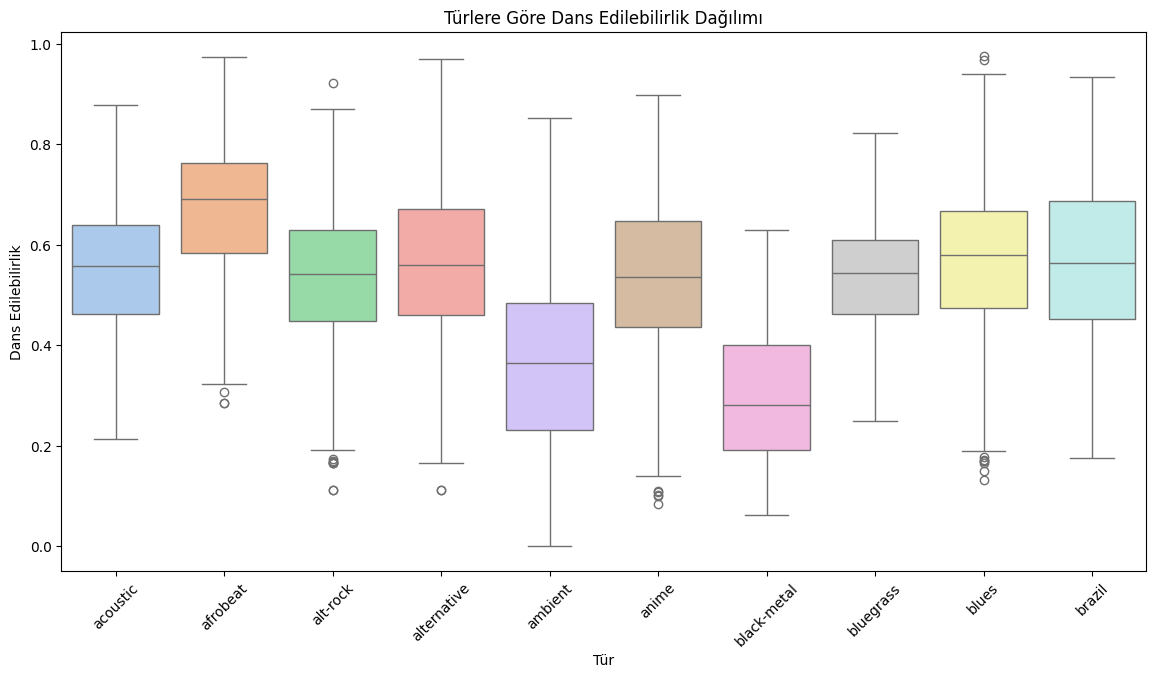

In [9]:
# Box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x="track_genre", y="danceability", data=data, palette="pastel")
plt.title("Türlere Göre Dans Edilebilirlik Dağılımı")
plt.xlabel("Tür")
plt.ylabel("Dans Edilebilirlik")
plt.xticks(rotation=45)
plt.show()


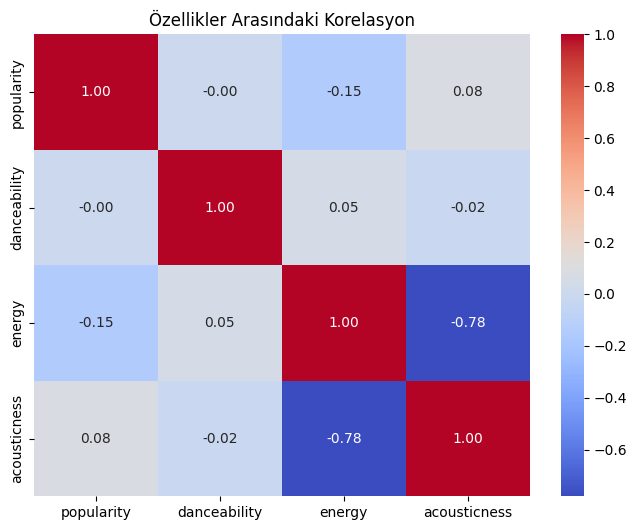

In [10]:
# Korelasyon matrisi
corr_matrix = data[["popularity", "danceability", "energy", "acousticness"]].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Özellikler Arasındaki Korelasyon")
plt.show()
